In [218]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#download NFL data
df_games = pd.read_csv('games.csv')
df_player_play = pd.read_csv('player_play.csv')
df_players = pd.read_csv('players.csv')
df_plays = pd.read_csv('plays.csv')
df_w1 = pd.read_csv('tracking_week_1.csv')
df_w2 = pd.read_csv('tracking_week_2.csv')
df_w3 = pd.read_csv('tracking_week_3.csv')
df_w4 = pd.read_csv('tracking_week_4.csv')
df_w5 = pd.read_csv('tracking_week_5.csv')
df_w6 = pd.read_csv('tracking_week_6.csv')
df_w7 = pd.read_csv('tracking_week_7.csv')
df_w8 = pd.read_csv('tracking_week_8.csv')
df_w9 = pd.read_csv('tracking_week_9.csv')

In [3]:
df_player_play['inMotionAtBallSnap'].value_counts()

inMotionAtBallSnap
False    103276
True       4572
Name: count, dtype: int64

In [5]:
df_player_play_motion = df_player_play[df_player_play['inMotionAtBallSnap']==True]

In [6]:
df_player_play_motion[['inMotionAtBallSnap','nflId']].head()

,inMotionAtBallSnap,nflId
28,True,47857
53,True,53079
138,True,47879
162,True,52536
191,True,44881


In [58]:
#function for personal use
#returns player name given their id
def playid_to_playername(nflid):
    name = df_players.loc[df_players['nflId'] == nflid, 'displayName']
    return name.iloc[0] if not name.empty else "Invalid ID"

In [70]:
df_plays_motion.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [82]:
# #remove unneeded plays

#no plays nullified by penalties present, checked using df_plays['playNullifiedByPenalty'].value_counts()

#remove kneels/spikes/sneaks
df_plays = df_plays[df_plays['qbSpike'] == False]
df_plays = df_plays[df_plays['qbKneel'] == 0]
df_plays = df_plays[df_plays['qbSneak'] == False]

df_plays['qbSneak'].value_counts()


Series([], Name: count, dtype: int64)

In [8]:
playid_to_playername(47879)

'Dawson Knox'

In [56]:
#label plays where motion occurred or not
df_plays['motion'] = df_plays.apply(lambda row: 1 if ((row['gameId'], row['playId']) in zip(df_player_play_motion['gameId'], df_player_play_motion['playId'])) else 0, axis=1)

In [42]:
df_plays['motion'].value_counts()

motion
0    11644
1     4480
Name: count, dtype: int64

In [16]:
df_plays_motion = df_plays[df_plays['motion'] == 1]
df_plays_no_motion = df_plays[df_plays['motion'] == 0]

In [46]:
#percent of plays with motion
len(df_plays_motion) / len(df_plays)

0.277846688166708

In [18]:
df_plays_motion['expectedPointsAdded'].mean()

0.0007741646358876166

In [20]:
df_plays_no_motion['expectedPointsAdded'].mean()

-0.04098342180522609

In [36]:
df_plays_motion['isDropback'].value_counts()

isDropback
True     2385
False    2095
Name: count, dtype: int64

In [38]:
df_plays_motion_dropback = df_plays_motion[df_plays_motion['isDropback'] == 1]
df_plays_no_motion_dropback = df_plays_no_motion[df_plays_no_motion['isDropback'] == 1]
df_plays_motion_no_dropback = df_plays_motion[df_plays_motion['isDropback'] == 0]
df_plays_no_motion_no_dropback = df_plays_no_motion[df_plays_no_motion['isDropback'] == 0]

In [48]:
df_plays_motion_dropback['expectedPointsAdded'].mean()

0.04897727812047309

In [50]:
df_plays_no_motion_dropback['expectedPointsAdded'].mean()

-0.032469481772631315

In [52]:
df_plays_motion_no_dropback['expectedPointsAdded'].mean()

-0.05410145620455933

In [54]:
df_plays_no_motion_no_dropback['expectedPointsAdded'].mean()

-0.05556203190995571

In [ ]:
#at a cursory glance, it seems that motion is more effective in the passing game
#check if this difference changes after filtering more

In [ ]:
#when eventually finished with data cleaning, export to a new .csv so we don't have to keep running this code constantly

In [88]:
df_player_play_motion.columns

Index(['gameId', 'playId', 'nflId', 'teamAbbr', 'hadRushAttempt',
       'rushingYards', 'hadDropback', 'passingYards', 'sackYardsAsOffense',
       'hadPassReception', 'receivingYards', 'wasTargettedReceiver',
       'yardageGainedAfterTheCatch', 'fumbles', 'fumbleLost',
       'fumbleOutOfBounds', 'assistedTackle', 'forcedFumbleAsDefense',
       'halfSackYardsAsDefense', 'passDefensed', 'quarterbackHit',
       'sackYardsAsDefense', 'safetyAsDefense', 'soloTackle', 'tackleAssist',
       'tackleForALoss', 'tackleForALossYardage', 'hadInterception',
       'interceptionYards', 'fumbleRecoveries', 'fumbleRecoveryYards',
       'penaltyYards', 'penaltyNames', 'wasInitialPassRusher',
       'causedPressure', 'timeToPressureAsPassRusher',
       'getOffTimeAsPassRusher', 'inMotionAtBallSnap', 'shiftSinceLineset',
       'motionSinceLineset', 'wasRunningRoute', 'routeRan',
       'blockedPlayerNFLId1', 'blockedPlayerNFLId2', 'blockedPlayerNFLId3',
       'pressureAllowedAsBlocker', 'timeT

In [98]:
#concatenate the player tracking dataframes
tracking = pd.concat([df_w1,df_w2,df_w3,df_w4,df_w5,df_w6,df_w7,df_w8,df_w9])

In [104]:
#change all plays to same direction
def reverse_deg(deg):
    if deg < 180:
        return deg + 180
    if deg >= 180:
        return deg - 180
    
#standardize values
tracking["o"]=np.where(tracking["playDirection"] == "left", tracking["o"].apply(reverse_deg), tracking["o"])
        
tracking["dir"] = np.where(tracking["playDirection"] == "left", tracking["dir"].apply(reverse_deg), tracking["dir"])
        
tracking["x"] = np.where(tracking["playDirection"] == "left", tracking["x"].apply(lambda x: 120 - x), tracking["x"])
        
tracking["y"] =np.where(tracking["playDirection"] == "left",  tracking["y"].apply(lambda y: 160/3 - y), tracking["y"])

In [116]:
tracking.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN


In [143]:
df_player_motion_ids = df_player_play_motion[['gameId','playId','nflId']]

In [145]:
#tracking data with only motion plays
tracking_motion = tracking.merge(df_player_motion_ids, on=['gameId', 'playId', 'nflId'], how='inner')

In [214]:
#find how long every motion was (can also calculate total distance traveled later / change of direction mid motion)

#get initial coordinates
df_motion_macro = tracking_motion.groupby(['gameId', 'playId', 'nflId'])[['x','y']].first().reset_index()

#get coordinates at the time of snap
tracking_motion_snap = tracking_motion[tracking_motion['frameType'] == 'SNAP']
tracking_finalcoord = tracking_motion_snap.groupby(['gameId', 'playId', 'nflId'])[['x','y']].first().reset_index()

#combine and find change in x and y values
df_motion_macro = df_motion_macro.merge(tracking_finalcoord, on=['gameId', 'playId', 'nflId'], how='inner', suffixes=('First','Final'))
df_motion_macro['xChange'] = df_motion_macro['xFinal'] - df_motion_macro['xFirst']
df_motion_macro['yChange'] = df_motion_macro['yFinal'] - df_motion_macro['yFirst']

In [216]:
df_motion_macro.head()

,gameId,playId,nflId,xFirst,yFirst,xFinal,yFinal,xChange,yChange
0,2022090800,80,47857.0,38.26,13.913333,34.17,21.793333,-4.09,7.88
1,2022090800,101,53079.0,43.59,23.063333,45.39,27.003333,1.80,3.94
2,2022090800,212,47879.0,72.67,23.493333,73.32,20.503333,0.65,-2.99
3,2022090800,236,52536.0,79.94,24.433333,83.21,18.063333,3.27,-6.37
4,2022090800,299,44881.0,20.20,22.710000,23.39,19.480000,3.19,-3.23


<Axes: xlabel='xChange', ylabel='Count'>

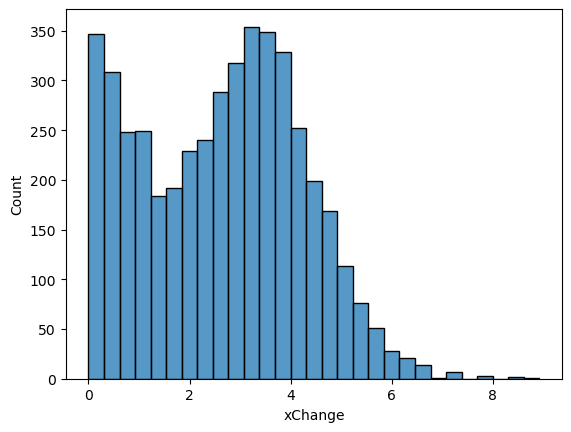

In [224]:
#yards for each motion
sns.histplot(df_motion_macro['xChange'].abs())

In [ ]:
#find which motions went towards/away/across from ball